In [121]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

## Let's examine some data from Google trends, that lists interest in the phrase 'car dealership' over time

In [122]:
car_df=pd.read_csv('Car_dealership.csv', index_col=0)

In [123]:
car_df.head()

,car_dealership
Month,
2004-01,43
2004-02,40
2004-03,48
2004-04,39
2004-05,45


In [124]:
car_df.index = pd.to_datetime(car_df.index)

<AxesSubplot:xlabel='Month'>

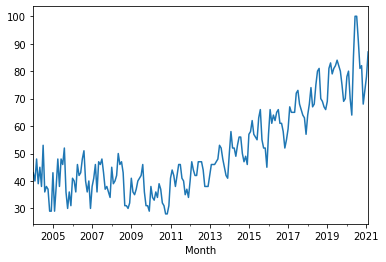

In [125]:
car_df['car_dealership'].plot()

## Let's see if we can see any trend or seasonality

<Figure size 864x1296 with 0 Axes>

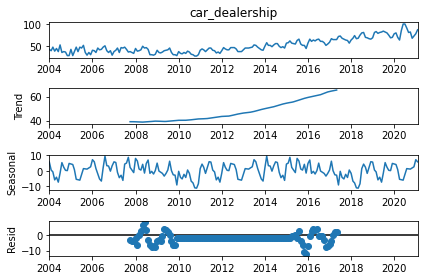

In [126]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(car_df['car_dealership'], period=90, model='additive')
plt.figure(figsize = (12, 18))
result.plot()
plt.tight_layout()
plt.show()


## We can see that there is an upwards trend and a seasonality effect. We can also see that neither trend nor seasonality can explain the 'noise' seen from residuals around 2008-2010 and 2015-2018. Holt-Winter predictive model can be used for data that has both trend and seasonality so let's test it out. 

In [127]:
train_data = car_df.loc['2004-03':'2019-03']
validation_data= car_df.loc['2019-03':'2021-03']

C:\Users\gabri\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


RMSE is: 9.656779353349663


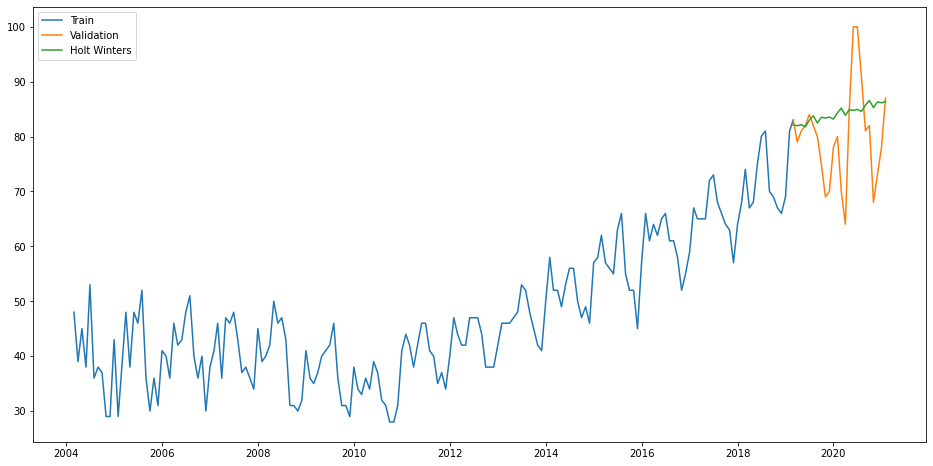

In [144]:
estimate1 = validation_data.copy()
fit1 = ExponentialSmoothing(np.asarray(train_data['car_dealership']), seasonal_periods= 7, trend = 'add', seasonal= 'add').fit()
estimate1['Holt_Winter'] = fit1.forecast(len(validation_data))
plt.figure(figsize = (16,8))
plt.plot(train_data['car_dealership'], label = 'Train')
plt.plot(validation_data['car_dealership'], label = 'Validation')
plt.plot(estimate1.Holt_Winter, label = 'Holt Winters')
plt.legend(loc = 'best')


rmse= sqrt(mean_squared_error(validation_data['car_dealership'], estimate1['Holt_Winter']))
print('RMSE is:', rmse)

C:\Users\gabri\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


8.97344242834039

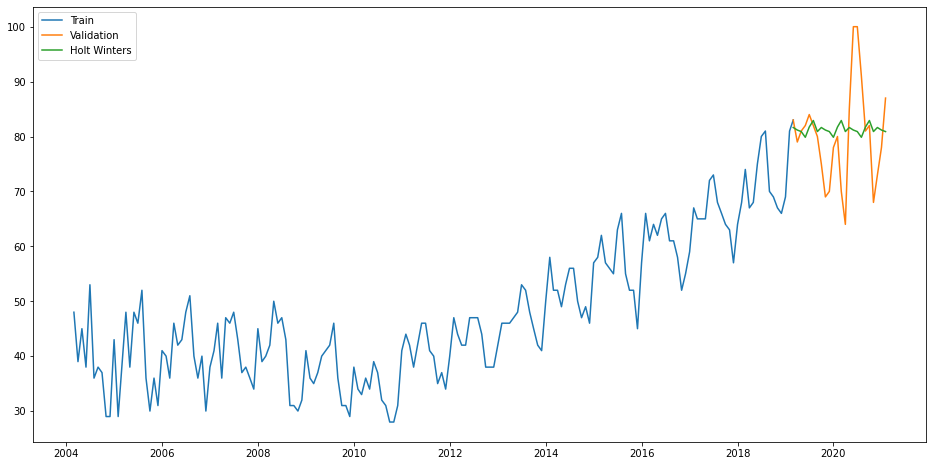

In [145]:
estimate2 = validation_data.copy()
fit2 = ExponentialSmoothing(np.asarray(train_data['car_dealership']), seasonal_periods= 7, trend = 'add', seasonal= 'mul', damped_trend=True).fit()
estimate2['Holt_Winter'] = fit2.forecast(len(validation_data))
plt.figure(figsize = (16,8))
plt.plot(train_data['car_dealership'], label = 'Train')
plt.plot(validation_data['car_dealership'], label = 'Validation')
plt.plot(estimate2.Holt_Winter, label = 'Holt Winters')
plt.legend(loc = 'best')


rmse = sqrt(mean_squared_error(validation_data['car_dealership'], estimate2['Holt_Winter']))
rmse

## We can see from the Root-mean-square deviation that when we use multiplicative seasonality and damped trend the model get's a bit closer to the actual values, but clearly it is still not perfect. Clearly something about the model can be reajusted or tweaked, or alternatively there might be issues because the data here is only telling some of the story and there might be other variables at play. 